# Taxi Fare Prediction

## Problem Statement
This case study is to predict the taxi fare for a taxi ride in New York City from a given pickup point to the dropoff location. Try Building Predictive Model Using various algorithm like Decision tree and Random Forest.

## Data Definition

**unique_id**: Unique identifier - (string)    

**date_time_of_pickup**: time when the ride started - (timestamp)

**longitude_of_pickup**: Longitude of the taxi ride from pickup point - (float) - (Numerical)

**latitude_of_pickup**: Latitude of the taxi ride from pickup point - (float) - (Numerical)
    
**longitude_of_dropoff**: Longitude of the taxi ride dropoff point  - (float) - (Numerical)
    
**latitude_of_dropoff**: Latitude of the taxi ride dropoff point - (float) - (Numerical)
    
**no_of_passenger**: count of the passengers during the ride - (integer) - (Numerical)
    
**amount**: Fair for the taxi ride in dollar(target variable)
   

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Prepare and Analyze the Data](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Type](#Data_Types)
        - 4.1.2 - [Feature Engineering](#Feature_Eng)
        - 4.1.3 - [Summary Statistics](#Summary_Statistics)
        - 4.1.4 - [Missing Values](#Missing_Values)
    - 4.2 - [Exploratory Data Analysis](#EDA)
        - 4.2.1 - [Peak hours](#Peak)
        - 4.2.2 - [Mean fare for each hour during weekdays and weekends](#Mean_Fare)
        - 4.2.3 - [Distribution of key numerical variables](#Distribution)
5. **[Random Forest](#Random_Forest)**
    - 5.1 - [Random Forest Model](#RF_Model)
    - 5.2 - [Random Forest with GridSearchCV ](#RF_CV)
6. **[Conclusion and Interpretation](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries

In [ ]:
%import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

<a id='set_options'></a>
# 2. Set Options

In [ ]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
# pd.options.display.max_rows = None

<a id='Read_Data'></a>
# 3. Read Data

In [ ]:
# read csv file using pandas
df_taxi = pd.read_csv('TaxiFare.csv')

In [ ]:
# display the top 5 rows of the dataframe
df_taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
# Checking for duplicates
df_taxi[df_taxi.duplicated()]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


#### There is No duplicate values

In [ ]:
df_taxi.shape

(50000, 8)

The column `unique_id` contains the unique identifier for each observation, which is redundant for further analysis. Thus, we drop this column.

In [ ]:
# Before droping any column its better to save the data in other location
df = df_taxi.copy(deep=True)

In [ ]:
df_taxi.drop('unique_id',axis=1,inplace=True)

<a id='data_preparation'></a>
# 4. Prepare and Analyze the Data

Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <br>
                        2. Check the data types. If not as per business context, change the data types  <br>
                        3. Study Summary Statistics <br>
                        4. Distribution of Variables<br>
                        5. Analyze relationship between numeric variables <br>
                        6. Check for missing values<br>
                        7. Study correlation<br>
                        8. Analyze relationship between numeric and categoric variables <br><br>
                        Note: It is an art to explore data and one will need more and more practice to gain expertise in this area. </b>

<a id='Data_Understanding'></a>
## 4.1 Understand the Data

**Let us now see the number of variables and observations in the data.**

In [ ]:
# 'shape' returns the dimensions of the data
df_taxi.shape

(50000, 7)

We see the dataframe has 7 columns and 50000 rows. It means there are 7 features and 50000 observations.

<a id='Data_Types'></a>
### 4.1.1 Data Type



In order to know whether the datatype of each variable is correct, we do the following:<br><br>
                        1. Check the data type <br>
                        2. Change the incorrect data type <br>
                        3. Recheck the data type after the conversion <br>
                        4. Feature engineering <br>
                        5. Drop the redundant variables <br>

**1. Check the data type.**

In [ ]:
# use 'dtypes' to check the data type of each variable
df_taxi.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

From the above output, we see that the data type of 'date_time_of_pickup' is 'object '.<br>

But according to data definition, 'date_time_of_pickup 'is a date time stamp variable, which is wrongly interpreted as 'object', so we will convert this variable data type to 'datetime'.</br></b>

**2. Change the incorrect data type.**

In [ ]:
# convert object to datetime using to_datetime method from pandas
#if error is set to'coerce', then invalid parsing will be set as NaN.
df_taxi.date_time_of_pickup = pd.to_datetime(df_taxi.date_time_of_pickup, errors='coerce')

**3. Recheck the data type after the conversion.**

In [ ]:
# recheck the data type of each column
df_taxi.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

Now the data type of each variable is as per the data definition

<a id='Feature_Eng'></a>
### 4.1.2 Feature Engineering

We will extract date time features from the variable 'date_time_of_pickup'.

For feature engineering, we do the following:<br><br>
                        1. Feature addition <br>
                        2. Drop the redundant variables

**1. Add new variables**

We will extract new features from variable `date_time_of_pickup`.

In [ ]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
# extract various date time components as seperate variables
df_taxi = df_taxi.assign(hour = df_taxi.date_time_of_pickup.dt.hour,
                         day = df_taxi.date_time_of_pickup.dt.day,
                        month = df_taxi.date_time_of_pickup.dt.month,
                        year = df_taxi.date_time_of_pickup.dt.year,
                        dayofweek = df_taxi.date_time_of_pickup.dt.dayofweek)

**2. Drop the redundant variable.**

As we have extracted new features from variable `date_time_of_pickup` this variable is redundant for further analysis. Hence we drop this variable.

In [ ]:
# drop the column 'date_time_of_pickup' using drop()
# 'axis = 1' drops the specified column

df_taxi = df_taxi.drop('date_time_of_pickup',axis=1)

In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int64  
 7   day                   50000 non-null  int64  
 8   month                 50000 non-null  int64  
 9   year                  50000 non-null  int64  
 10  dayofweek             50000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 4.2 MB


As now have the required features, after having extracted new ones and dropping the redundant variables.

In [ ]:
df_taxi.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,13.489080,15.672040,6.273300,2011.739260,3.029980
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,6.506935,8.660789,3.461157,1.862639,1.956936
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


### Checking for Missing Values

In [ ]:
df_taxi.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
hour                    0
day                     0
month                   0
year                    0
dayofweek               0
dtype: int64

### There is no missing values in the datset

In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int64  
 7   day                   50000 non-null  int64  
 8   month                 50000 non-null  int64  
 9   year                  50000 non-null  int64  
 10  dayofweek             50000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 4.2 MB


<a id='EDA'></a>
## 4.2 Exploratory Data Analysis

### 4.2.1 Year info

<Axes: xlabel='year', ylabel='count'>

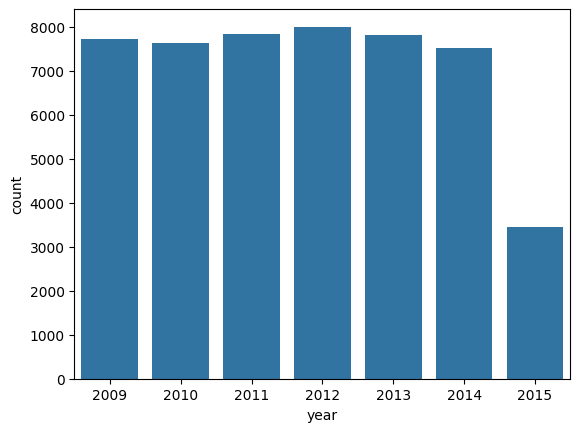

In [ ]:
sns.countplot(x = df_taxi.year)

In [ ]:
df_taxi.year.value_counts()

2012    8005
2011    7832
2013    7819
2009    7716
2010    7646
2014    7530
2015    3452
Name: year, dtype: int64

We can see that year by year the count of the passenger is reducing

### Now will check what was the average fair price based on yearly

In [ ]:
df_taxi.groupby('year')['amount'].mean()

year
2009    10.049168
2010    10.137180
2011    10.465931
2012    11.228863
2013    12.439474
2014    13.139649
2015    13.064392
Name: amount, dtype: float64

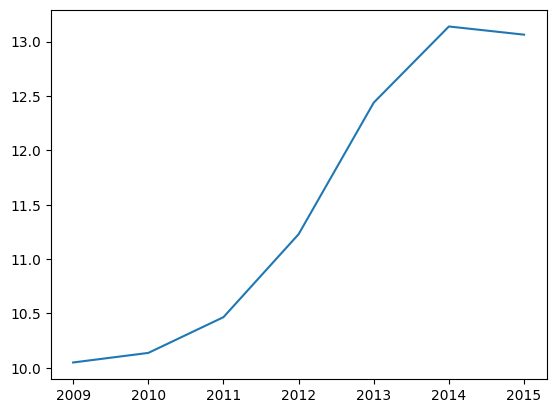

In [ ]:
plt.plot(df_taxi.groupby('year')['amount'].mean())

### we can see that year on year the fare is increasing, so this might be the case for the drop of passenger yearly

In [ ]:
df_taxi.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


### Month

In [ ]:
df_taxi.month.value_counts()

3     4671
5     4612
1     4546
4     4519
6     4516
2     4302
10    4046
12    4015
9     3810
11    3764
7     3656
8     3543
Name: month, dtype: int64

In [ ]:
df_taxi.month.value_counts().index

Int64Index([3, 5, 1, 4, 6, 2, 10, 12, 9, 11, 7, 8], dtype='int64')

<Axes: xlabel='month', ylabel='count'>

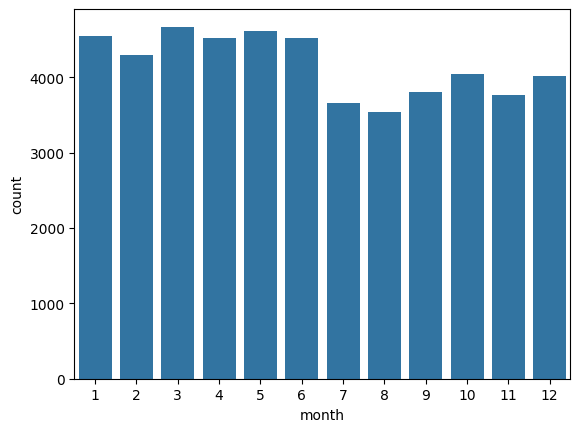

In [ ]:
sns.countplot(x = df_taxi.month)

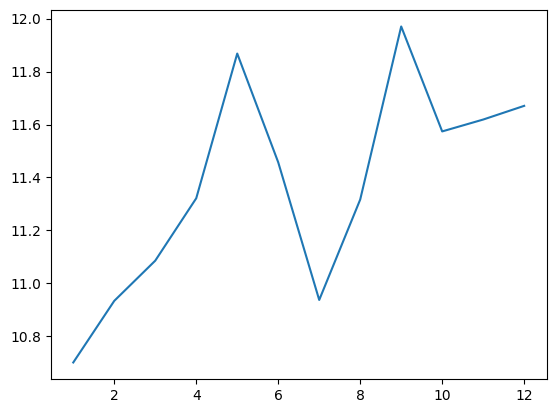

In [ ]:
plt.plot(df_taxi.groupby('month')['amount'].mean())

### We can see that on the month of Jan the fare price is very low compared to different month

### Peak hours

We will check for the business during the weekdays and weekends.

<b> We will check the peak hours during the following: <br><br>
                        1. Weekdays <br>
                        2. Weekends <br>

**1. Plot a countplot to check the peak hours during weekdays**

To plot a countplot, we use the `countplot()` from the seaborn library.

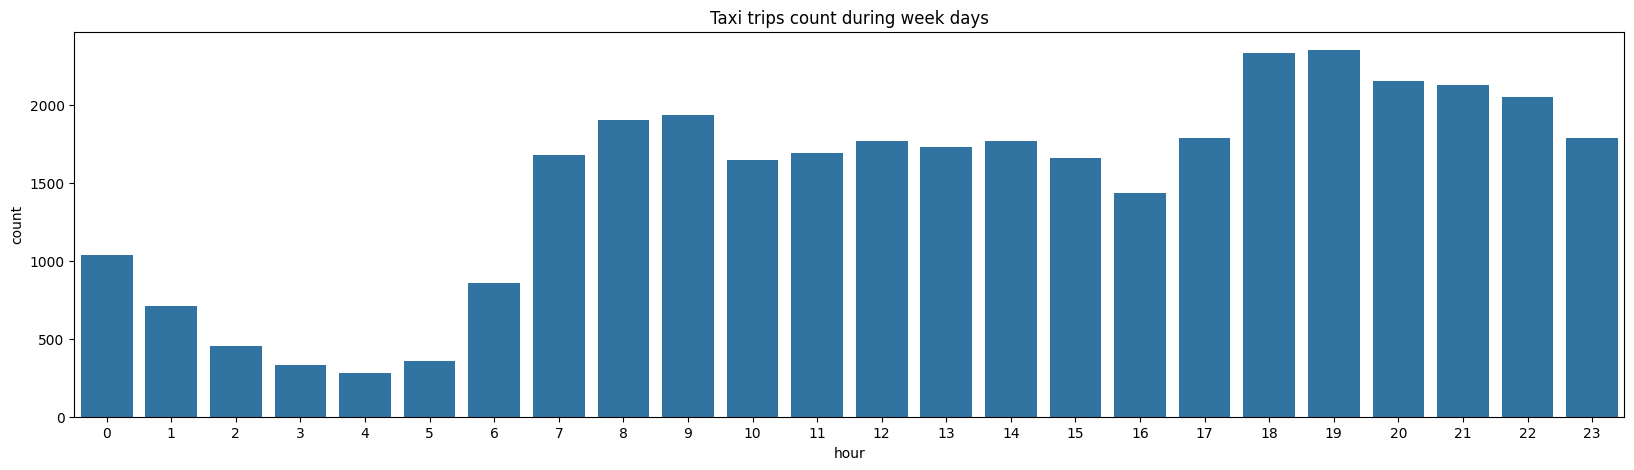

In [ ]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week days')
#plot the countplot for weekdays
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <=4)])
plt.show()

We see that during the weekdays the count of trips start to peak from 7 am and is highest at 9am. In the evening the peak is at 6pm and 7pm.

**2. Plot a countplot to check the peak hours during weekends**

<Axes: title={'center': 'Taxi trips count during week ends'}, xlabel='hour', ylabel='count'>

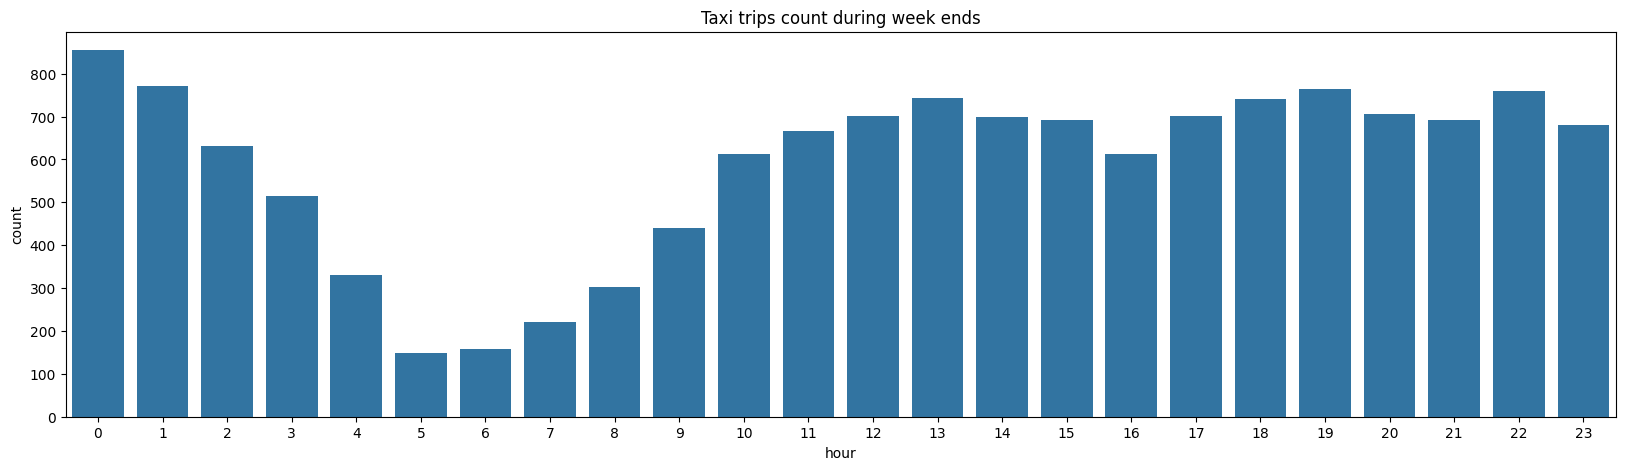

In [ ]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week ends')
#plot the countplot for weekends
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 5) & (df_taxi.dayofweek <=6)])

We see that during the weekends the count of trips is high after 12 midnight to 3am to 4am. This pattern is different from the weekdays. In the evening the demand is almost evenly high after 6pm till late night except.

### From the above plot, we can notice that the pattern for demand of taxi is different for weekdays and weekends.

### 4.2.2 Average fare for each hour during weekdays and weekends

**1. Compute the hourly average fare for weekdays and weekends**

In [ ]:
# Set the days in the dataset as week days and week ends
week_days = df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <= 4)]
week_ends = df_taxi.loc[(df_taxi.dayofweek >= 5) & (df_taxi.dayofweek <= 6)]
# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour
week_days_fare = week_days.groupby(['hour']).amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).amount.mean().to_frame().reset_index()

**2. Plot the mean fare**

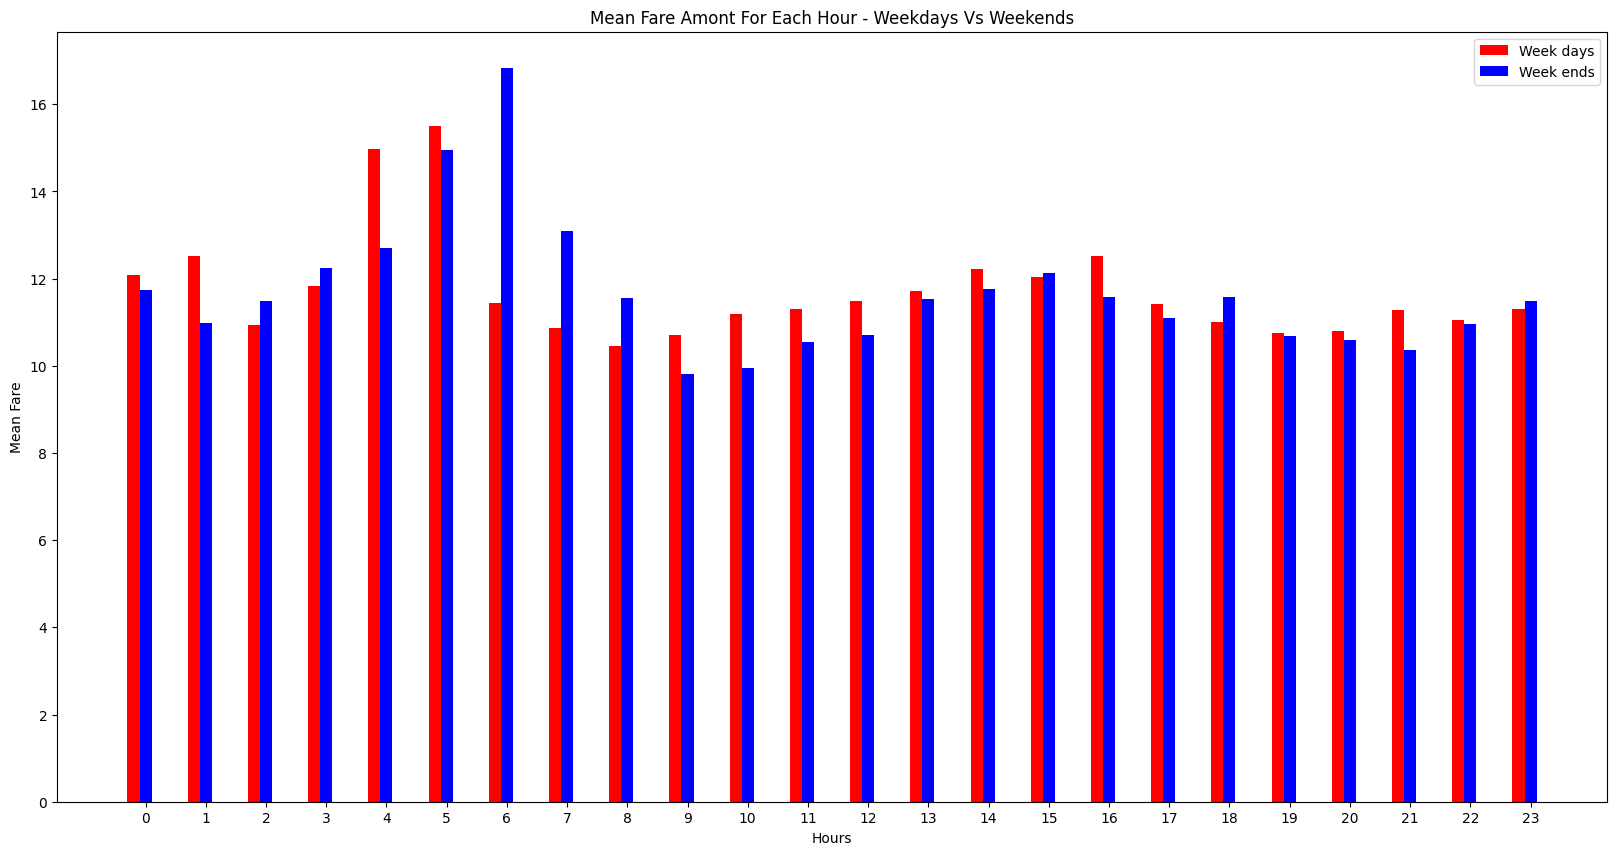

In [ ]:
# hours
x = np.array(week_days_fare.hour)
# an array of week day fare
y = np.array(week_days_fare.amount)
# an array of week end fare
z = np.array(week_ends_fare.amount)

# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amont For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()


In [ ]:
x-0.2

array([-0.2,  0.8,  1.8,  2.8,  3.8,  4.8,  5.8,  6.8,  7.8,  8.8,  9.8,
       10.8, 11.8, 12.8, 13.8, 14.8, 15.8, 16.8, 17.8, 18.8, 19.8, 20.8,
       21.8, 22.8])

We notice that the average fares for each hour are different for week days and week ends. Average fare for weekdays during morning hours 6,7 and 8 is much less compared to weekends.

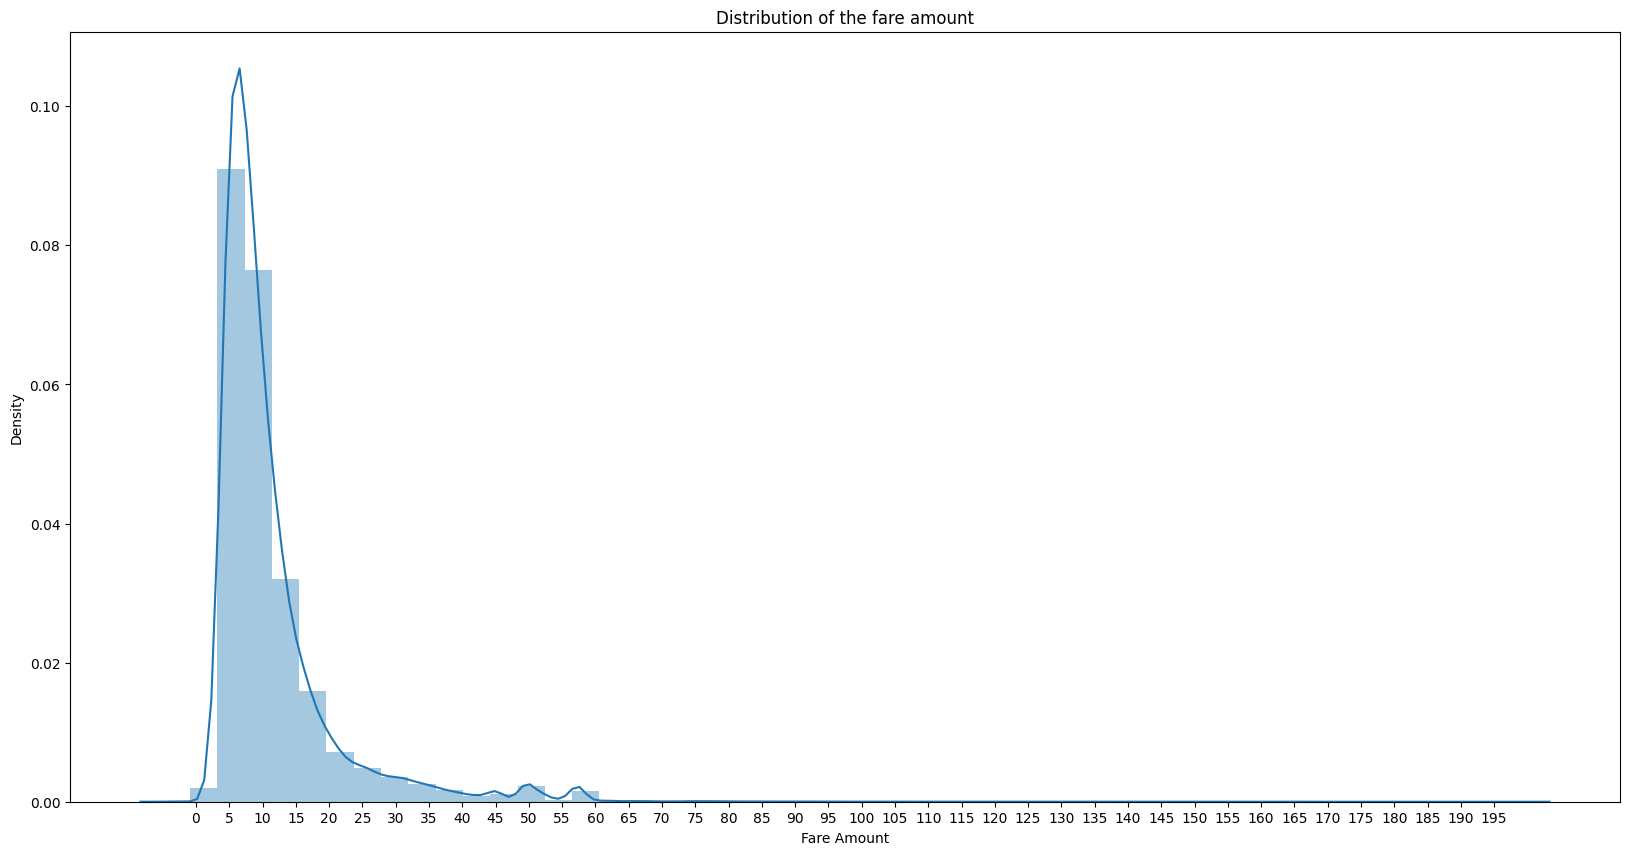

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df_taxi.amount)
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.xticks(range(0,200,5))
plt.show()

<Axes: xlabel='amount'>

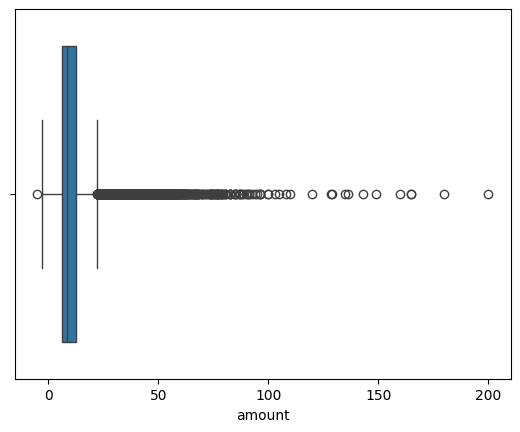

In [ ]:
sns.boxplot(x = df.amount)

We can see that most the trips have a fare amount of 3 to 20 dollars. There are a few small peaks around 50 and 58 dollars as well.

In [ ]:
df_taxi.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


### Spliting the dataset into Dependent and independent features

In [ ]:
X = df_taxi.drop('amount',axis=1)
y = df_taxi['amount']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Model 1:- Will build the base model

In [ ]:
model1 = RandomForestRegressor(n_estimators=100,random_state=0)
model1.fit(X_train,y_train)
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

In [ ]:
print(f'MSE_y_train ={train_mse}')
print(f'MSE_y_test ={test_mse}')

MSE_y_train =3.4779151588121726
MSE_y_test =20.491011323032907


In [ ]:
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')

RMSE_y_train =1.8649169308074214
RMSE_y_test =4.5266998269194865


In [ ]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.9638797606708202
test_r-squared =0.7671639075056651


### We can see the model is overfitted so will apply some hyperparameter tuning along with cross validation to make model more generalized

# Randomized Search CV

In [ ]:
# Define the hyperparameters and their respective distributions
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(estimator=model1, param_distributions=param_dist,  cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}


In [ ]:
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

In [ ]:
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

In [ ]:
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')

RMSE_y_train =3.7948083017724983
RMSE_y_test =4.401295806976547


In [ ]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.8504414245805855
test_r-squared =0.779885818024511
